<a href="https://colab.research.google.com/github/oluwafemidiakhoa/Mindserach/blob/master/Graph_sage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

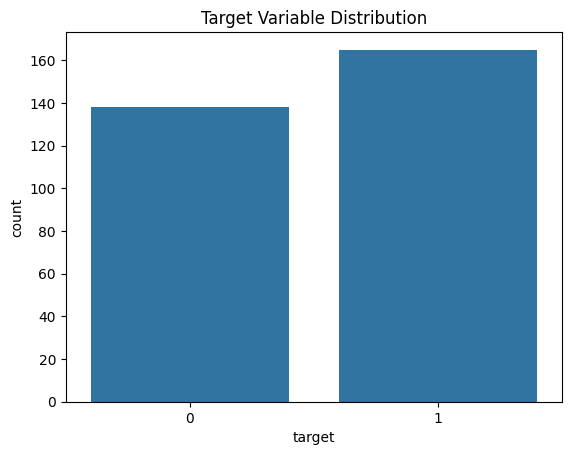

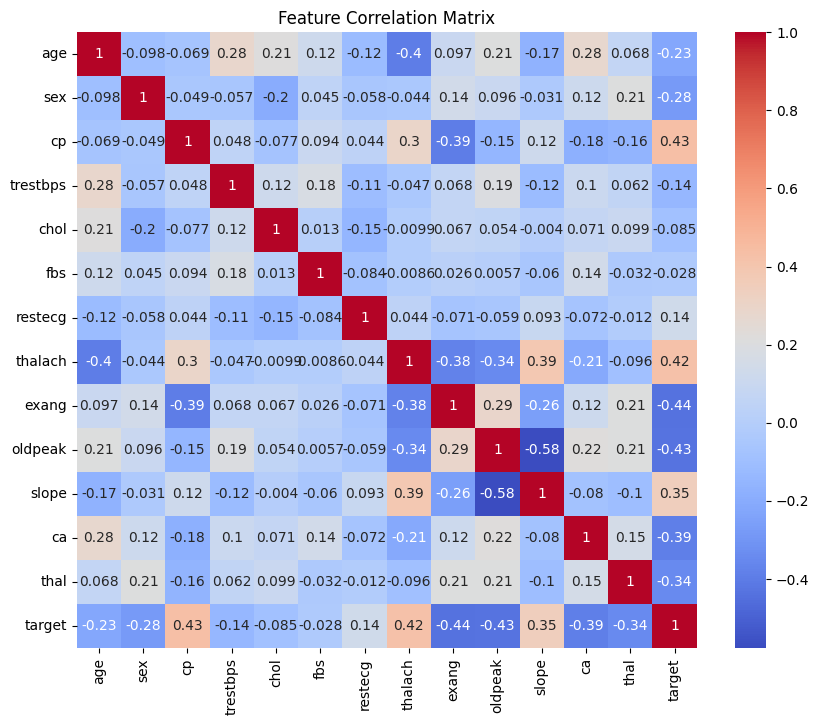

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/heart-disease.csv')

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Handling missing values and outliers (if any)
# Impute missing values with median for numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


XGBoost Model Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



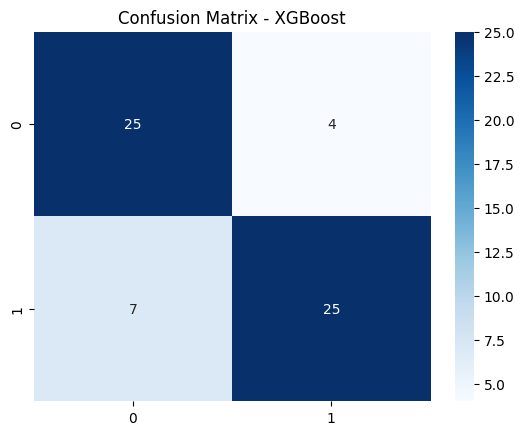

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42)

# Train the model
model_xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate the model
print(f'XGBoost Model Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}')
print(classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5255 - loss: 0.7318 - val_accuracy: 0.6735 - val_loss: 0.6328
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6351 - loss: 0.6743 - val_accuracy: 0.7551 - val_loss: 0.5930
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6599 - loss: 0.6431 - val_accuracy: 0.7959 - val_loss: 0.5592
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7198 - loss: 0.5943 - val_accuracy: 0.8367 - val_loss: 0.5312
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7583 - loss: 0.5556 - val_accuracy: 0.8571 - val_loss: 0.5047
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7897 - loss: 0.5489 - val_accuracy: 0.8367 - val_loss: 0.4867
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7683 - loss: 0.5289 - val_accuracy: 0.7755 - val_loss: 0.4707
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7548 - loss: 0.5295 - val_accuracy: 0.7755 - val_loss: 0.4588
Epoch 9/50
7/7 ━━

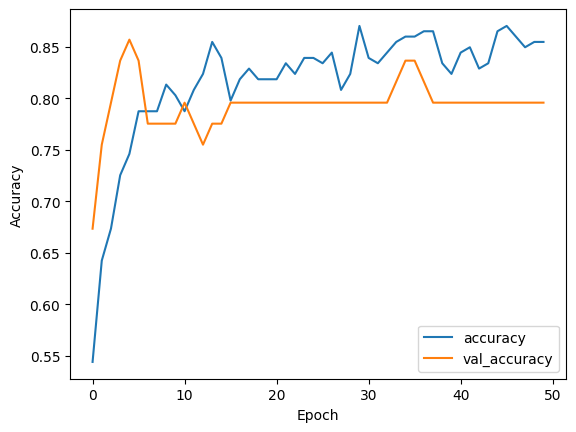

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8391 - loss: 0.4913
Neural Network Test Accuracy: 0.85


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
test_loss, test_acc = model_nn.evaluate(X_test_scaled, y_test)
print(f'Neural Network Test Accuracy: {test_acc:.2f}')


In [ ]:
!pip install scikit-optimize
from skopt import BayesSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Implement BayesSearchCV for hyperparameter optimization
opt = BayesSearchCV(model_xgb, param_grid, n_iter=30, cv=5, scoring='accuracy', random_state=42)
opt.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print(f'Best Hyperparameters: {opt.best_params_}')
print(f'Best Cross-Validation Accuracy: {opt.best_score_:.2f}')

# Re-evaluate with the optimized model
y_pred_optimized = opt.predict(X_test_scaled)
print(f'Optimized Model Accuracy: {accuracy_score(y_test, y_pred_optimized):.2f}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.5 MB/s eta 0:00:00
Best Hyperparameters: OrderedDict([('learning_rate', 0.01), ('max_depth', 7), ('min_child_weight', 5), ('n_estimators', 100)])
Best Cross-Validation Accuracy: 0.83
Optimized Model Accuracy: 0.87


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.0 MB/s eta 0:00:00


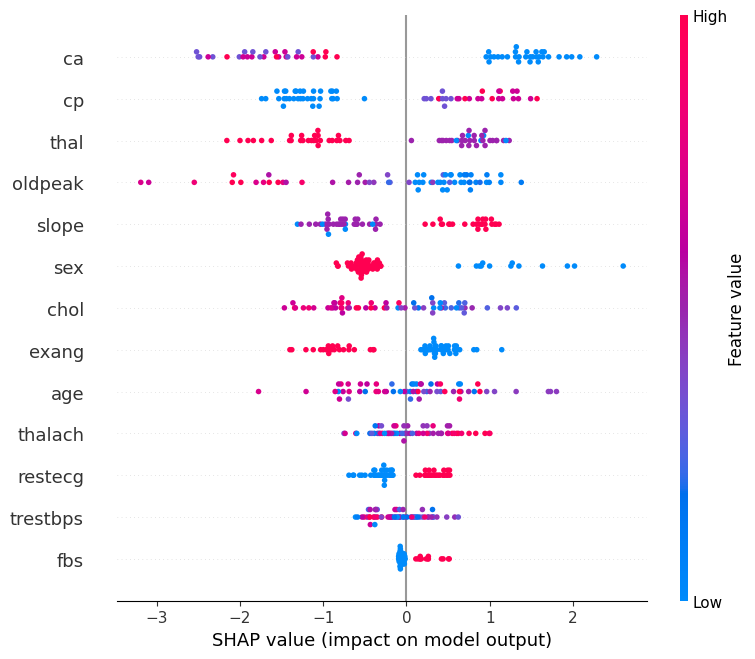

In [ ]:
!pip install shap
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    data_scaled = scaler.transform([data])
    prediction = model_xgb.predict(data_scaled)
    output = int(prediction[0])
    return jsonify(result=output)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [2]:
!pip install transformers torch torchvision torchaudio torch-geometric
!pip install pandas numpy scikit-learn matplotlib networkx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 669.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00


In [14]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer
from torch_geometric.nn import SAGEConv, global_mean_pool
from torch_geometric.data import Data, Batch
from torch.utils.data import DataLoader, random_split

# Define the hybrid model with GraphSAGE and stronger regularization
class HybridModel(nn.Module):
    def __init__(self, transformer_model_name="bert-base-uncased", gnn_input_dim=128, gnn_hidden_dim=64, num_classes=3):
        super(HybridModel, self).__init__()

        # Load pre-trained Transformer model
        self.transformer = AutoModel.from_pretrained(transformer_model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(transformer_model_name)

        # Define a more complex GNN architecture with GraphSAGE
        self.gnn_conv1 = SAGEConv(gnn_input_dim, gnn_hidden_dim)
        self.gnn_conv2 = SAGEConv(gnn_hidden_dim, gnn_hidden_dim)

        # Dropout layer for stronger regularization
        self.dropout = nn.Dropout(0.4)

        # Fully connected layers after GNN and Transformer
        self.fc1 = nn.Linear(self.transformer.config.hidden_size + gnn_hidden_dim, 128)
        self.fc2 = nn.Linear(128, num_classes)  # Multi-class classification

    def forward(self, text, graph_data):
        # Transformer forward pass
        tokens = self.tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        transformer_output = self.transformer(**tokens).last_hidden_state[:, 0, :]  # Take the [CLS] token representation

        # GNN forward pass using GraphSAGE
        x, edge_index, batch = graph_data.x, graph_data.edge_index, graph_data.batch
        gnn_output = self.gnn_conv1(x, edge_index)
        gnn_output = torch.relu(gnn_output)
        gnn_output = self.gnn_conv2(gnn_output, edge_index)
        gnn_output = torch.relu(gnn_output)

        # Global pooling to get graph-level representation
        gnn_output = global_mean_pool(gnn_output, batch)

        # Combine the outputs
        combined_output = torch.cat((transformer_output, gnn_output), dim=1)
        combined_output = self.dropout(combined_output)  # Apply dropout

        # Fully connected layers
        output = torch.relu(self.fc1(combined_output))
        output = self.fc2(output)  # No softmax here, CrossEntropyLoss applies softmax internally

        return output

# Early stopping mechanism with increased patience
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.counter = 0

    def __call__(self, validation_loss):
        if validation_loss < self.best_loss - self.min_delta:
            self.best_loss = validation_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

# Instantiate the model
model = HybridModel(num_classes=3)

# Compute class weights based on the distribution of the dataset
class_weights = torch.tensor([1.0, 2.0, 2.0])  # Modify as per class imbalance
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Early stopping with increased patience
early_stopping = EarlyStopping(patience=5)

# Dummy dataset and data loader
class DummyDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.text_data = ["The future of AI in medicine is bright."] * 100
        self.num_nodes = 10
        self.num_node_features = 128

    def __len__(self):
        return len(self.text_data)

    def __getitem__(self, idx):
        x = torch.rand((self.num_nodes, self.num_node_features))
        edge_index = torch.tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]])
        graph_data = Data(x=x, edge_index=edge_index)
        text = self.text_data[idx]
        target = torch.randint(0, 3, (1,)).item()
        return text, graph_data, torch.tensor([target])

def custom_collate_fn(batch):
    texts, graphs, targets = zip(*batch)
    batched_graph = Batch.from_data_list(graphs)
    return texts, batched_graph, torch.stack(targets).squeeze()

dataset = DummyDataset()
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=custom_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=custom_collate_fn)

# Training and validation loop with patience in early stopping and GraphSAGE
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for texts, batched_graph, targets in train_loader:
        output = model(texts, batched_graph)
        loss = criterion(output, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for texts, batched_graph, targets in val_loader:
            output = model(texts, batched_graph)
            loss = criterion(output, targets)
            val_loss += loss.item()
    print(f"Validation Loss after Epoch [{epoch+1}]: {val_loss/len(val_loader)}")

    # Reduce learning rate if plateauing
    scheduler.step(val_loss)

    # Early stopping
    if early_stopping(val_loss):
        print(f"Early stopping triggered after epoch {epoch+1}")
        break


Epoch [1/10], Loss: 1.1141847908496856
Validation Loss after Epoch [1]: 1.0770546197891235
Epoch [2/10], Loss: 1.055885636806488
Validation Loss after Epoch [2]: 1.1926071643829346
Epoch [3/10], Loss: 1.059023141860962
Validation Loss after Epoch [3]: 0.981515645980835
Epoch [4/10], Loss: 1.0231106996536254
Validation Loss after Epoch [4]: 1.1158066590627034
Epoch [5/10], Loss: 1.1116249799728393
Validation Loss after Epoch [5]: 1.0541921059290569
Epoch [6/10], Loss: 1.0754503726959228
Validation Loss after Epoch [6]: 1.1021257042884827
Epoch [7/10], Loss: 1.0435717225074768
Validation Loss after Epoch [7]: 1.0567560990651448
Epoch [8/10], Loss: 1.0837070763111114
Validation Loss after Epoch [8]: 1.178534706433614
Early stopping triggered after epoch 8
